In [1]:
#this hack is required to get the package working unfortunately.
import sys
import os
# os.chdir("../..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tdwg.lib.DMD import DMD, apply_image_hold
from tdwg.lib.DMD_patterns import generate_angled_grating, sawtooth_img, generate_horizontal_grating, generate_vertical_grating, generate_all_on, generate_beamsteering_edge, generate_all_off

# from lib.GoldeyeCamera import take_sequence, load_sequence_img

import time
import os

('USB0::0x0699::0x03B4::C020764::INSTR', 'ASRL1::INSTR')
Loading library: C:/Program Files/ALP-4.2/ALP-4.2 high-speed API/x64/alpV42.dll
DMD found, resolution = 1024 x 768.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pyvisa as visa

import tdwg.lib.spectrometer as sm
from tdwg.lib.tektronixAFG1022 import TektronixAFG1022
from tdwg.lib.tektronixTBS1104 import TektronixTBS1104

In [5]:
# afg = TektronixAFG1022('USB0::0x0699::0x0353::2033108::INSTR')
osc = TektronixTBS1104('USB0::0x0699::0x03B4::C020764::INSTR')

Connected to  TEKTRONIX,TBS 1104,C020764,CF:91.1CT FV:v26.05



##  Check alignment - on pylon camera

Number of rows is not divisible by len_1s + len_0s; incomplete grating


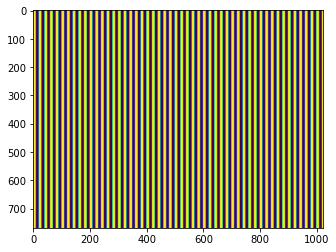

In [18]:
grating_period = 10 #use 20 to see gratings by eye, change to 1 to see on pylon camera
img = generate_vertical_grating(grating_period)
# img = generate_all_on()
apply_image_hold(img) # img = take_img()

plt.imshow(img)

In [61]:
img = generate_all_on()
apply_image_hold(img)

##  Check electrical contacts

For the SRN6 chips, I get 3.15mA of current when I expect 2.55mA of current. 
This means that applying 860V would be too risky. Instead, I am going to apply 700Volts just to be on the safe side. 

Can measure number of fringes on the LN, to judge how much field I am applying in the chip itself.

In [62]:
from tdwg.lib.electrical_helpers import parallel_plate_cap, imp_cap, cap_series

In [63]:
from tdwg.lib.conductivity_fits import eps_r_a4, eps_r_a6_2um

In [64]:
eps_r_a4, eps_r_a6_2um

(6.42989993, 8.16685487)

In [73]:
# real current
f = 100
A = 22e-3 * 6e-3
C1 = parallel_plate_cap(A, 1.85*2e-6, 8)
C2 = parallel_plate_cap(A, 2e-6, 4)
C3 = parallel_plate_cap(A, 700e-9, 30)
C_total = cap_series([C1, C2, C3])
Z = imp_cap(f, C_total)
V = 210

I_th = np.abs(V/Z)

In [74]:
I_th

0.00015642938057657633

In [75]:
t, V3 = osc.get_trace(channel=3)
I_exp = (V3.max() - V3.min()) / 2 * 1e-3

In [76]:
I_exp

0.00019800000000000002

In [155]:
t, V3 = osc.get_trace(channel=3)
I_parasitic_exp = (V3.max() - V3.min()) / 2 * 1e-3

In [156]:
I_exp - I_parasitic_exp

0.0

In [54]:
# parasitic capacity
Z_parasitic = np.abs(V/I_parasitic_exp)
C_parasitic = 1 / 2 / np.pi / f / Z_parasitic
C_parasitic * 1e9

0.3374084793548182

## Beamsteering
Use following code to align the chip with beamsteering

In [209]:
#between 40 and 90 looks promising

In [253]:
img = generate_beamsteering_edge(0.1, 352)
apply_image_hold(img)

In [247]:
img = generate_beamsteering_edge(1, 352-100)
apply_image_hold(img)

In [272]:
for i in np.arange(58, 65, 2):
    img = generate_beamsteering_edge(0.4, 352-i)
    apply_image_hold(img)
    print(i)
    time.sleep(3)

58
60
62
64


In [308]:
img = generate_beamsteering_edge(0.2, 352-52)

In [295]:
for i in np.arange(40, 61, 5):
    print(i)
    img = generate_beamsteering_edge(0.2, 352-i)
    apply_image_hold(img)
    time.sleep(2)

40
45
50
55
60


In [249]:
t, V4_beamsteering = osc.get_trace(channel=4)
# t, V1 = osc.get_trace(channel=1)